In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [3]:
from google.colab import files


uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['headbrain.csv']))
print(data.head())

Saving headbrain.csv to headbrain.csv
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


**Implementation without in-built libraries**

Find a linear relationship between head size and brain weight.
We also need to find the values of ‘m’ and ‘c’, so for that, we need to find the mean of X & Y values.

In [4]:
# collecting x & y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# calculate mean of x & y
mean_x = np.mean(X)
mean_y = np.mean(Y)

print(X)
print(Y)

print(mean_x)
print(mean_y)

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

Calculate m & c using the formulas:\
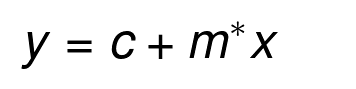
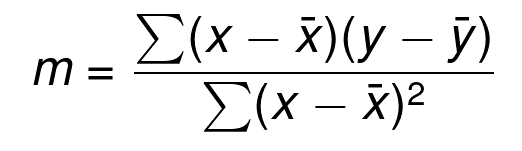

In [5]:
# total no.of input values
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  #numer +=(Y[i] - mean_y) **2 * (X[i] - mean_x)
  #denom += (X[i] - mean_x)*(Y[i] - mean_y) *(X[i] - mean_x)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.26342933948939945 
c = 325.57342104944223


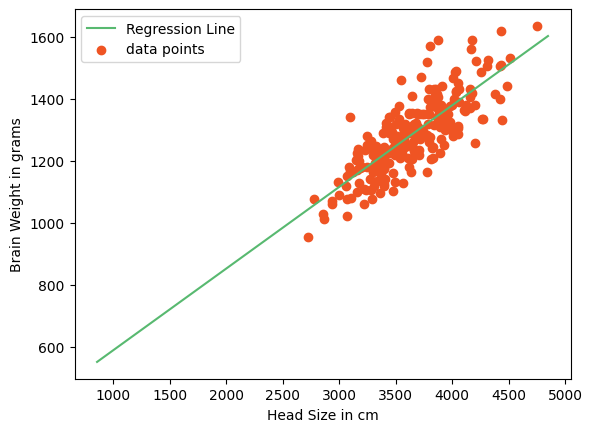

In [6]:

# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
# Create a linear space with 100 values between min_x and max_x.
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

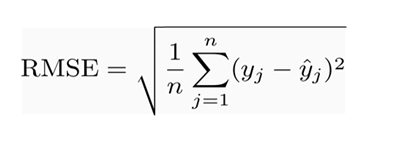

In [9]:
rmse = 0
for i in range(len(X)):
    y_pred=  c + m* X[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/len(X))
print(rmse)

72.1206213783709


R² score: SST is the total sum of squares and SSR is the total sum of squares of residuals. R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong. Now we will find the R² Score.

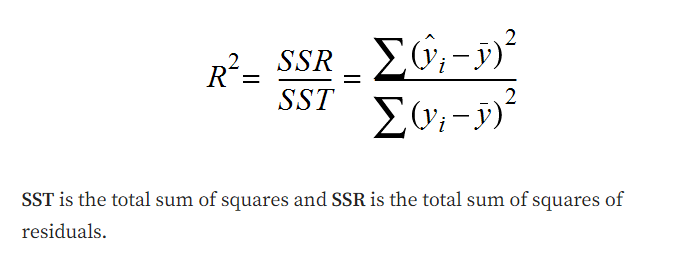

In [10]:
sumofsquares = 0
sumofresiduals = 0
for i in range(len(X)) :
    y_pred = c + m * X[i]
    sumofsquares += (Y[i] - mean_y) ** 2
    sumofresiduals += (Y[i] - y_pred) **2

score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.6393117199570003


### **Implementation using sklearn**





In [ ]:
# Linear regression implementation using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(X.shape)
# convert unspecified number of rows and we have provided column as 1 but rows as unknown.
X = X.reshape(-1, 1)
print(X.shape)

reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)
r2_square = reg.score(X, Y)

print (r2_square)

(237,)
(237, 1)
0.639311719957
